In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt
from pygimli.physics.seismics import solvePressureWave, drawSeismogram, ricker

(<Axes: xlabel='$x$ in m', ylabel='$y$ in m'>, None)

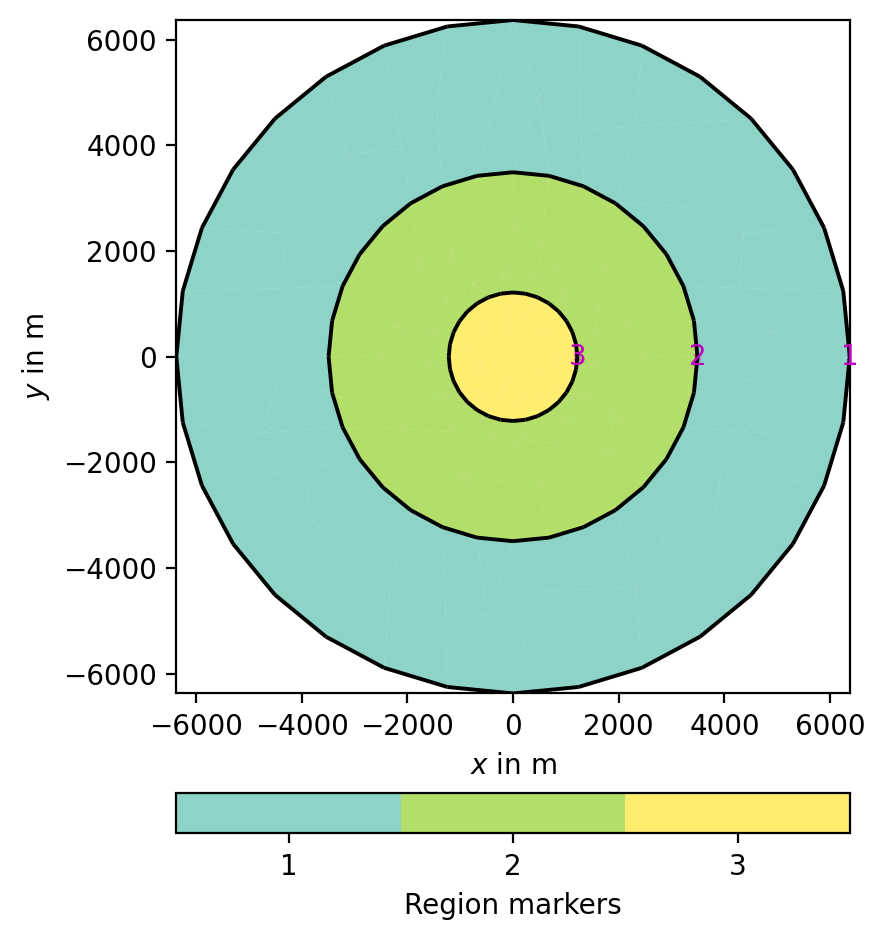

In [2]:
earth = mt.createCircle(radius=6.371e3, nSegments=32, marker=1)
outercore = mt.createCircle(radius=3.49e3, nSegments=32, marker=2)
innercore = mt.createCircle(radius=1.216e3, nSegments=32, marker=3)
geo = earth+outercore+innercore
pg.show(geo)

(<Axes: xlabel='$x$ in m', ylabel='$y$ in m'>,
 <matplotlib.colorbar.Colorbar at 0x2033b7d0190>)

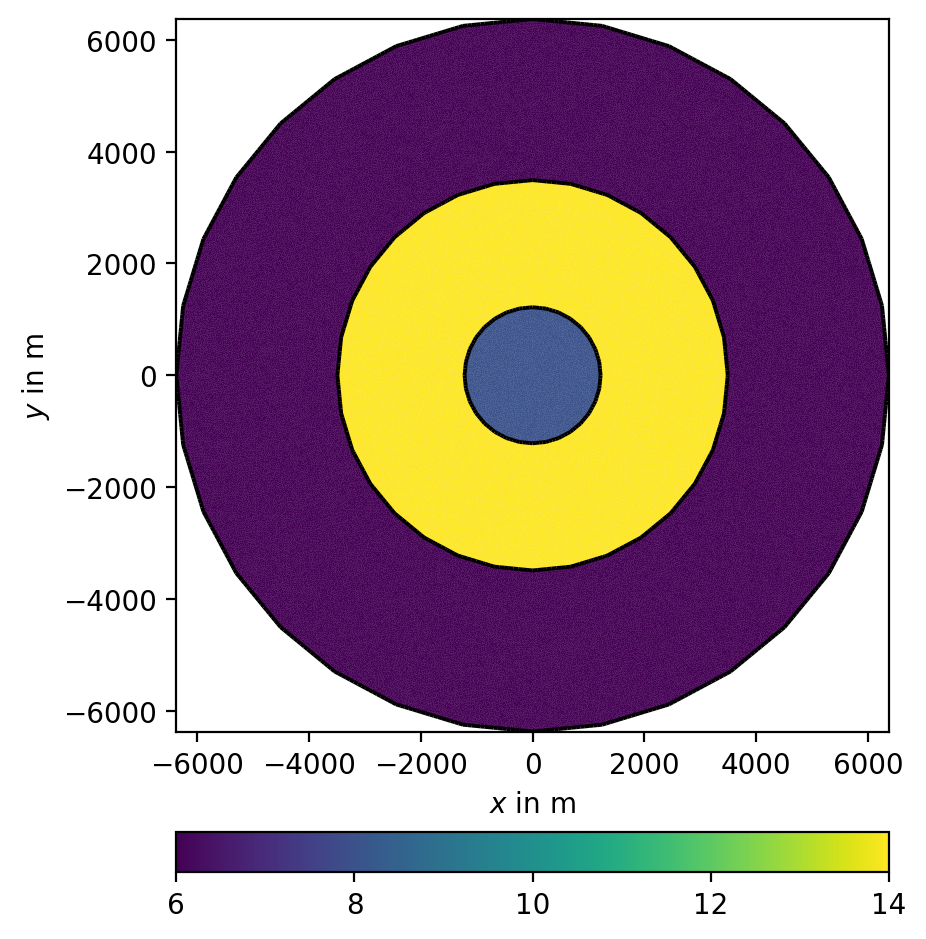

In [3]:
mesh = mt.createMesh(geo, area=3e3)
vmap = [[1, 6], [2, 14], [3, 8]]
pg.show(mesh, vmap)

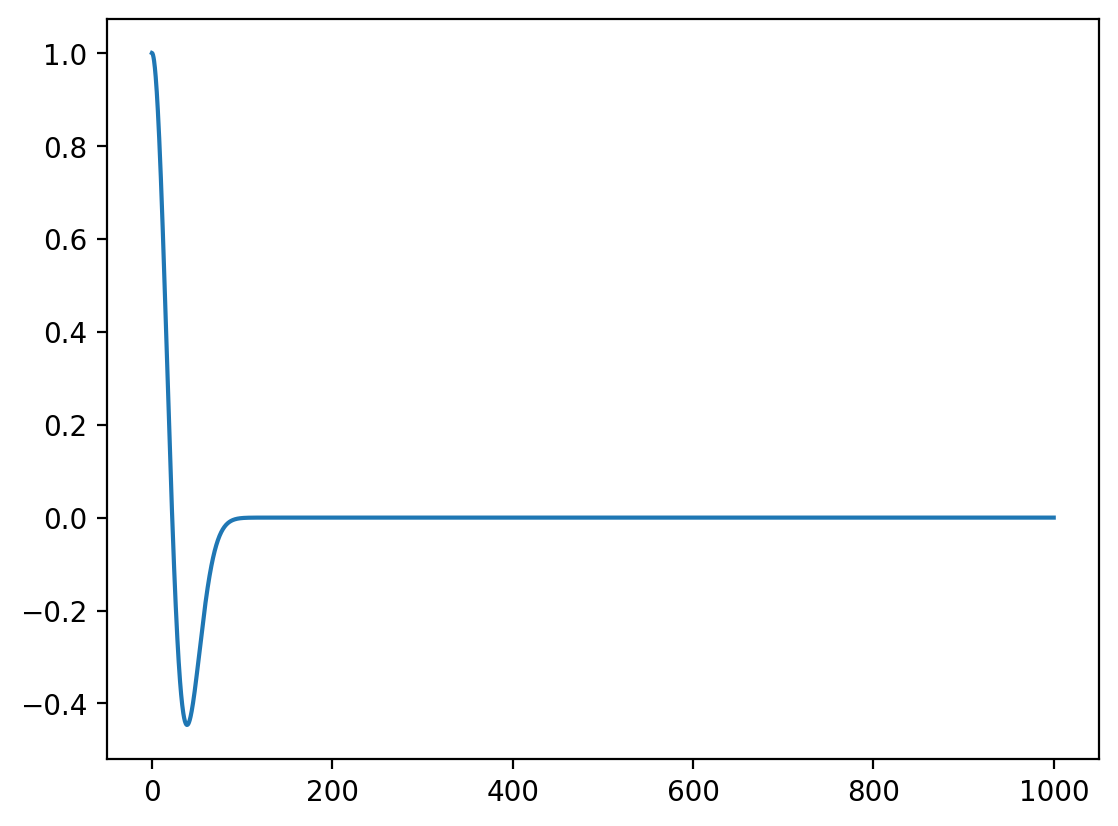

In [4]:
t = np.arange(0, 1000, 0.3)
f = 0.01
uS = ricker(f, t)
plt.plot(t, uS)

In [5]:
mesh.populate("v", vmap)
mesh["times"] = t
A = solvePressureWave(mesh, velocities=mesh["v"], times=t, sourcePos=[-6100, 0], uSource=uS, verbose=True)
B = pg.utils.gmat2numpy(A)

   0%|          |0/3334 [00:00 < ?]

(<Axes: xlabel='$x$ in m', ylabel='$y$ in m'>,
 <matplotlib.colorbar.Colorbar at 0x2037731b6d0>)

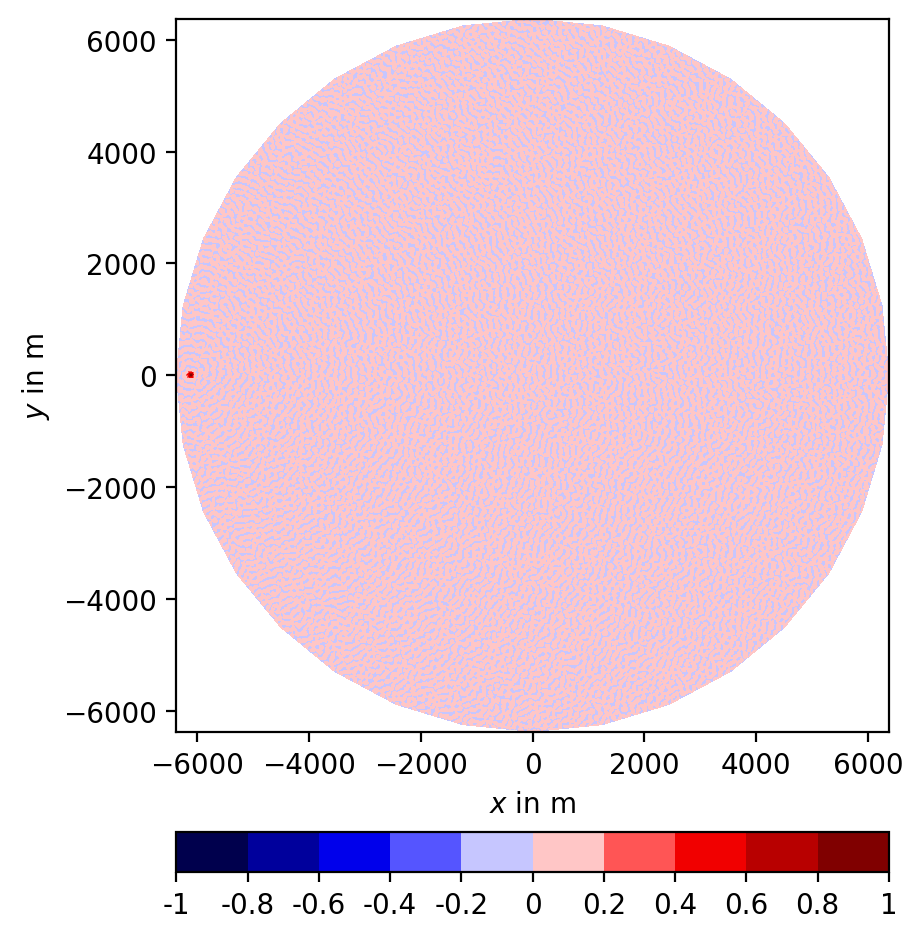

In [8]:
pg.show(mesh, A[10], cMin=-1, cMax=1, cMap="seismic",nLevs=11, contourLines=False)

In [66]:
ee = 2
ls = 1
vv = ee + ls
pg.show(mesh, symlog(A[30], 10**(-ee), linearSpread=1),
        cMin=-vv, cMax=vv, cMap="seismic",nLevs=21, contourLines=False)

(<Axes: >, <matplotlib.colorbar.Colorbar at 0x2b4884b7c10>)

In [67]:
dfsdfsd

NameError: name 'dfsdfsd' is not defined

In [ ]:
from pygimli.viewer import showAnimation
from pygimli.core.math import symlog

In [ ]:
fig, ax = plt.subplots()
# pg.show(mesh, symlog(B[100], 1e-3), ax=ax, cMin=-3, cMax=3, cMap="seismic",nLevs=21, contourLines=False)
vv = 2
ani = showAnimation(mesh, symlog(B[::30], 10**(-vv)), ax=ax, cMin=-vv, cMax=vv, cMap="seismic",nLevs=21, contourLines=False)

In [ ]:
ani.save("out.gif")

In [ ]:
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython import display
import matplotlib.pyplot as plt

In [ ]:
def AnimationFunction(frame):
    pg.show(mesh, A[frame*10], cMin=-1, cMax=1, cMap="seismic",nLevs=11, contourLines=False)

In [ ]:
# anim_created = FuncAnimation(Figure, AnimationFunction, frames=100, interval=25)

In [ ]:
ax, _ = pg.show(mesh, A[100], cMin=-1, cMax=1, cMap="seismic",nLevs=11, contourLines=False)